# Python notebook 

## Summary statistics
Amazon co-purchase data analysis


In [77]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [78]:
from neo4j.v1 import GraphDatabase

In [79]:
from neo4jrestclient.client import GraphDatabase
from neo4jrestclient.constants import RAW
from neo4jrestclient.client import Node 
from urllib.parse import urlparse
import re, json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

In [80]:
db = GraphDatabase("http://localhost:7474/db/data")
#retrieve a list of all nodes with the labels
q = "MATCH (n) RETURN distinct labels(n), count(*)"
params = {}
nodes = db.query(q, params=params, returns=RAW)
q = "match ()-[r]-() return distinct type(r), count(distinct(r));"
relationships = db.query(q, params=params, returns=RAW)
q = """MATCH (n:Group) 
MATCH (u:Cat)-[:in_group]->(n)
MATCH (w:Sub)-[:part_of]->(u)
MATCH (x:Micro)-[:is_micro_cat]->(w)
MATCH (y:Product)-[:belongs_to]->(x)
RETURN n.name, u.name, w.name, COUNT(DISTINCT(x)), COUNT(y);"""
prods = db.query(q, params=params, returns=RAW)

q = "MATCH (n:Product) RETURN DISTINCT(n.group), COUNT(n);"
prod_group = db.query(q, params=params, returns=RAW)

In [81]:
labels = []
counts = []
data = {}
for result in nodes:
    labels.append(result[0][0])
    counts.append(result[1]) 
    data[result[0][0]] = result[1]

In [82]:
labs=[]
count=[]
datum = {}
for result in relationships:
    labs.append(result[0].replace("'",''))
    count.append(result[1])
    datum[result[0].replace("'",'')] = result[1]


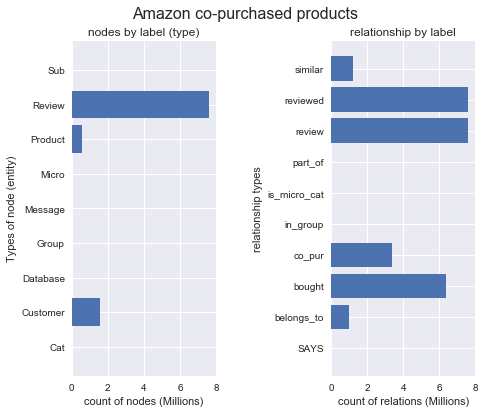

In [83]:
plt.figure(1)
plt.subplot(1,2,1)
types = [1,1,1,1,1,1,1,1,1]
counts_scaled = [count / 1000000 for count in counts]
ax = plt.barh(labels,counts_scaled)
plt.title('nodes by label (type)')              
plt.xlabel('count of nodes (Millions)')
plt.ylabel('Types of node (entity)')
plt.suptitle('Amazon co-purchased products', fontsize=16)
plt.subplot(1,2,2)
counts_scaled = [co / 1000000 for co in count]
ax = plt.barh(labs,counts_scaled)
plt.title('relationship by label')            
plt.xlabel('count of relations (Millions)')
plt.ylabel('relationship types')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.9)
plt.show()


In [84]:
data

{'Cat': 13,
 'Customer': 1555170,
 'Database': 1,
 'Group': 10,
 'Message': 1,
 'Micro': 675,
 'Product': 548552,
 'Review': 7593244,
 'Sub': 106}

In [85]:
datum

{'SAYS': 1,
 'belongs_to': 984915,
 'bought': 6359182,
 'co_pur': 3387388,
 'in_group': 39,
 'is_micro_cat': 893,
 'part_of': 113,
 'review': 7593244,
 'reviewed': 7593244,
 'similar': 1231439}

In [86]:
records = []
for prod in prods:
    records.append(prod)
    
summary = []
for sum in prod_group:
    summary.append(sum)

In [87]:
import pandas as pd
cols = ['Group','Category','Sub_cat','#micro','#num prods']

In [88]:
df = pd.DataFrame.from_records(records, columns=cols)
fd = pd.DataFrame.from_records(summary, columns=['Group','Count'])

In [89]:
df.describe()

,#micro,#num prods
count,560.000000,560.000000
mean,10.426786,63758.885714
std,6.499071,57672.503219
min,1.000000,1.000000
25%,5.000000,7790.000000
50%,10.000000,95038.000000
75%,15.000000,101804.000000
max,25.000000,323222.000000


In [90]:
prod_groups = df.groupby('Group').sum()


In [91]:
prod_groups

,#micro,#num prods
Group,,
BABY PRODUCT,386,2560880
BOOK,975,5281281
CE,482,2653725
DVD,786,4980417
MUSIC,882,5184579
SOFTWARE,393,2560899
SPORTS,89,92826
TOY,604,4806962
VIDEO,856,5022527


In [92]:
fd[(fd['Count'] > 10)]

,Group,Count
0,None,5868
2,DVD,19828
4,Book,393561
5,Music,103144
6,Video,26131


In [93]:
fd.sum()

Count    548552
dtype: int64